In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

In [15]:
# MNIST 데이터셋 다운로드
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
x = tf.placeholder(tf.float32, shape=[None,784])
y = tf.placeholder(tf.float32, shape=[None,10])

w = tf.Variable(tf.random_normal([784,10], dtype=tf.float32))
b = tf.Variable(tf.random_normal([10], dtype=tf.float32))

hf = tf.nn.softmax(tf.matmul(x, w) + b)
cost = tf.reduce_mean( -tf.reduce_sum( y * tf.log(hf), axis=1 ) )

lr = 0.1
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [17]:
#                              예측값                   실제값
isCorrect = tf.equal(tf.argmax(hf, axis=1), tf.argmax(y, axis=1))  # True or False 값이 저장

# 캐스팅
accuracy = tf.reduce_mean(tf.cast(isCorrect, dtype=tf.float32))

In [20]:
numEpochs = 15
batchSize = 100

# 트레이닝 이미지의 개수  # 55000
numIter = mnist.train.num_examples / batchSize 

epoch : 0001, cost : 3.026446257
epoch : 0002, cost : 1.126695069
epoch : 0003, cost : 0.890245463
epoch : 0004, cost : 0.777020281
epoch : 0005, cost : 0.707056833
epoch : 0006, cost : 0.657465268
epoch : 0007, cost : 0.620249349
epoch : 0008, cost : 0.590697647
epoch : 0009, cost : 0.566143490
epoch : 0010, cost : 0.545358483
epoch : 0011, cost : 0.527215146
epoch : 0012, cost : 0.511688908
epoch : 0013, cost : 0.498410055
epoch : 0014, cost : 0.486218478
epoch : 0015, cost : 0.475693832
정확도 :  0.889
레이블 :  [0]
예측 :  [0]




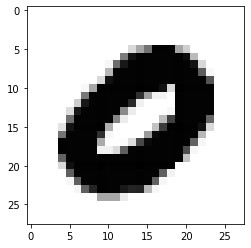

레이블 :  [2]
예측 :  [2]




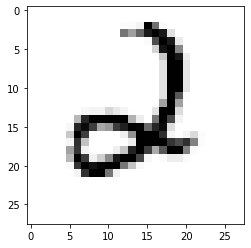

레이블 :  [2]
예측 :  [2]




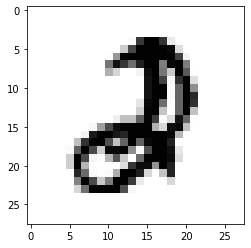

레이블 :  [3]
예측 :  [3]




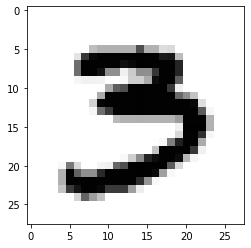

레이블 :  [3]
예측 :  [3]




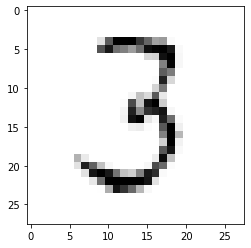

레이블 :  [4]
예측 :  [4]




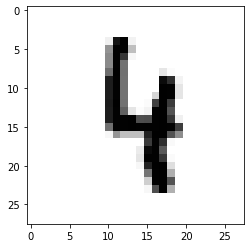

레이블 :  [1]
예측 :  [1]




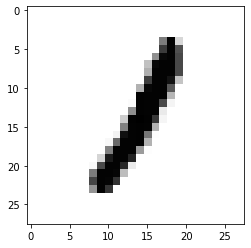

레이블 :  [6]
예측 :  [6]




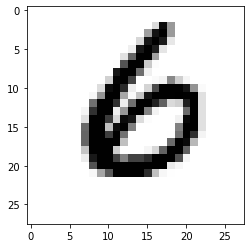

레이블 :  [9]
예측 :  [9]




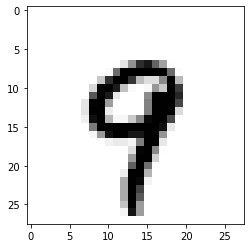

레이블 :  [3]
예측 :  [9]




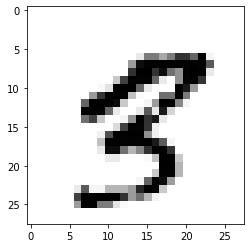

In [34]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    # 트레이닝
    for epoch in range(numEpochs) :
        # 한 epoch의 cost 평균
        avgCv = 0
        for i in range(int(numIter)) :
            # 한 번에 100개씩 데이터를 읽어옴
            batchX, batchY = mnist.train.next_batch(batch_size=batchSize)
            _, cv = sess.run([train, cost], feed_dict={x:batchX, y:batchY})
            avgCv += cv/numIter
        #             4자리 10진수
        print('epoch : {:04d}, cost : {:.9f}'.format(epoch+1, avgCv))
        
    print('정확도 : ',accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    for i in range(10):
        r = random.randint(0, mnist.test.num_examples-1)
        print('레이블 : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1)))
        print('예측 : ', sess.run(tf.argmax(hf, 1), feed_dict={x:mnist.test.images[r:r+1]}))
        print('\n')
        
        plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys')
        plt.show()

In [35]:
# 학습 모델 저장 / 불러오기 (keras)
# 다층퍼셉트론 모델
# 훈련셋, 검증셋, 테스트셋

In [69]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np

In [4]:
# 데이터 불러오기
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()

In [5]:
# 스케일링 작업
xTrain = xTrain.reshape(60000,784).astype('float32') / 255.0
xTest = xTest.reshape(10000,784).astype('float32') / 255.0

In [6]:
# 원핫인코딩
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [7]:
# 트레인 데이터를 검증셋과 분리
xVal = xTrain[42000:]
xTrain = xTrain[:42000]

yVal = yTrain[42000:]
yTrain = yTrain[:42000]

In [8]:
# 모델 구성
## 모델 객체 생성
model = Sequential()

## 히든 레이어
model.add(Dense(input_dim=28*28 , units=64, activation='relu'))

## 출력 레이어
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# 모델 학습 환경 설정 (compile)                                               평가체
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 (fit)
model.fit(xTrain, yTrain, epochs=5, batch_size=50, validation_data=(xVal, yVal))



Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 33us/step - loss: 0.3904 - accuracy: 0.8903 - val_loss: 0.2301 - val_accuracy: 0.9352
Epoch 2/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.1903 - accuracy: 0.9451 - val_loss: 0.1778 - val_accuracy: 0.9472
Epoch 3/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.1412 - accuracy: 0.9590 - val_loss: 0.1548 - val_accuracy: 0.9541
Epoch 4/5
42000/42000 [==============================] - 1s 32us/step - loss: 0.1117 - accuracy: 0.9679 - val_loss: 0.1322 - val_accuracy: 0.9624
Epoch 5/5
42000/42000 [==============================] - 1s 30us/step - loss: 0.0930 - accuracy: 0.9734 - val_loss: 0.1248 - val_accuracy: 0.9637


In [10]:
# 모델 평가
metrics = model.evaluate(xTest, yTest, batch_size=50)
print('평가결과 : ', metrics)

10000/10000 [==============================] - 0s 14us/step
평가결과 :  [0.10595211322477553, 0.9671000242233276]


In [11]:
# 예측             이 수보다 작은 랜덤 수   5개
idx = np.random.choice(xTest.shape[0],  5)

xHat = xTest[idx]

yHat = model.predict_classes(xHat)

yHat

array([5, 3, 2, 2, 1], dtype=int64)

In [12]:
print('예측값 : \n', yHat)
for i in yTest[idx] :
    print(np.argmax(i), end=' ')


예측값 : 
 [5 3 2 2 1]
6 3 2 2 1 

In [13]:
# 모델 저장
'''
모델 : 모델 아키텍쳐와 모델 가중치로 구성
모델 아키텍쳐 : 모델이 어떤 층으로 구성 (layer)
모델 가중치 : weight, bias

케라스 모델 저장 함수 : save() -> 아키텍쳐 + 가중치
  -> 파일형식이 'h5'로 저장됨
'''

model.save('mnist_model.h5')

In [14]:
# 모델 아키텍처 확인
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [16]:
# svg = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [2]:
model.summary()

In [9]:
# 실제 데이터 사용
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()

xTest = xTest.reshape(10000,784).astype('float32') / 255.0
yTest = np_utils.to_categorical(yTest)

idx = np.random.choice(xTest.shape[0], 10)
xHat = xTest[idx]

# 모델 불러오기
from keras.models import load_model

model = load_model('mnist_model.h5')

In [15]:
yHat = model.predict_classes(xHat)

print('예측값 : \n', yHat)
for i in yTest[idx] :
    print(np.argmax(i), end=' ')

예측값 : 
 [2 5 8 3 2 6 5 7 4 9]
2 5 8 3 2 6 5 7 4 9 

In [16]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [18]:
import pandas as pd
pd.DataFrame(xy)

,0,1,2,3,4
0,828.659973,833.450012,908100.0,828.349976,831.659973
1,823.020020,828.070007,1828100.0,821.655029,828.070007
2,819.929993,824.400024,1438100.0,818.979980,824.159973
3,816.000000,820.958984,1008100.0,815.489990,819.239990
4,819.359985,823.000000,1188100.0,818.469971,818.979980
5,819.000000,823.000000,1198100.0,816.000000,820.450012
6,811.700012,815.250000,1098100.0,809.780029,813.669983
7,809.510010,816.659973,1398100.0,804.539978,809.559998


In [36]:
xdata = xy[:,:-1]
ydata = xy[:,[-1]]

In [45]:
x = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([4,1], mean=0.1, dtype=tf.float32))
b = tf.Variable(tf.random_normal([1], dtype=tf.float32))

hf = tf.matmul(x, w) + b
cost = tf.reduce_mean(tf.square(hf - y))


train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [46]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(101) :
        _, cv, hfv = sess.run([train, cost, hf], feed_dict={x:xdata, y:ydata})
        if step % 10 == 0 :
            print(cv, hfv)

497543250000.0 [[ 498003.25]
 [1002927.3 ]
 [ 788886.2 ]
 [ 552891.8 ]
 [ 651679.94]
 [ 657168.56]
 [ 602289.2 ]
 [ 766937.56]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [55]:
# 스케일링
def myMinMax(data) : 
    
#     print(np.min(data))
#     print(np.min(data, axis=0))
    
    bj = data - np.min(data, 0)
    bm = np.max(data, 0) - np.min(data, 0)
    
    return bj / bm

xy = myMinMax(xy)

In [57]:
xdata = xy[:,:-1]
ydata = xy[:,[-1]]

In [66]:
x = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([4,1], mean=0.1, dtype=tf.float32))
b = tf.Variable(tf.random_normal([1], dtype=tf.float32))

hf = tf.matmul(x, w) + b
cost = tf.reduce_mean(tf.square(hf - y))


train = tf.train.GradientDescentOptimizer(1e-1).minimize(cost)

In [67]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(101) :
        _, cv, hfv = sess.run([train, cost, hf], feed_dict={x:xdata, y:ydata})
        if step % 10 == 0 :
            print(cv, hfv)

0.6021332 [[ 0.43911827]
 [-0.59430516]
 [-0.3086828 ]
 [-0.0174281 ]
 [-0.08631048]
 [-0.15096572]
 [-0.24029571]
 [-0.66816735]]
0.0478874 [[ 1.3040498 ]
 [ 0.40721792]
 [ 0.49462527]
 [ 0.5642798 ]
 [ 0.61933184]
 [ 0.5365882 ]
 [ 0.23951727]
 [-0.14102049]]
0.034118142 [[ 1.2395266 ]
 [ 0.47158283]
 [ 0.5199602 ]
 [ 0.5472977 ]
 [ 0.6162448 ]
 [ 0.53770024]
 [ 0.2479164 ]
 [-0.08913293]]
0.025036287 [[ 1.1852431 ]
 [ 0.52019477]
 [ 0.5357499 ]
 [ 0.527483  ]
 [ 0.6086118 ]
 [ 0.53328943]
 [ 0.2470054 ]
 [-0.05503625]]
0.018852077 [[ 1.1440834 ]
 [ 0.5617672 ]
 [ 0.5488486 ]
 [ 0.5096484 ]
 [ 0.6019673 ]
 [ 0.52902055]
 [ 0.24266359]
 [-0.03099766]]
0.014537965 [[ 1.1126571 ]
 [ 0.5974198 ]
 [ 0.5598096 ]
 [ 0.4937526 ]
 [ 0.59621876]
 [ 0.5250312 ]
 [ 0.23639144]
 [-0.01408023]]
0.011470829 [[ 1.088457  ]
 [ 0.6280362 ]
 [ 0.5690266 ]
 [ 0.4796712 ]
 [ 0.5912463 ]
 [ 0.5213682 ]
 [ 0.22917157]
 [-0.00221326]]
0.009258761 [[1.069655  ]
 [0.65435714]
 [0.57681006]
 [0.46725678]
 [0.5

In [68]:
# XOR 문제 tensorflow로 구현

In [71]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
ydata = np.array([[0],[1],[1],[0]])

In [74]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])
                                     
w = tf.Variable(tf.random_normal(shape=[2,1], dtype=tf.float32))
b = tf.Variable(tf.random_normal(shape=[1], dtype=tf.float32))

hf = tf.sigmoid(tf.matmul(x, w) + b)
cost = tf.reduce_mean(-y * tf.log(hf) - (1-y) * tf.log(1-hf))

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [80]:
predict = tf.cast(hf>0.5, tf.float32)

In [82]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(10001) :
        _, cv, hfv, pred = sess.run([train, cost, hf, predict], feed_dict={x:xdata, y:ydata})
        if step % 10000 == 0 :
            print(pred)
            print('\n')

[[0.]
 [1.]
 [0.]
 [0.]]


[[0.]
 [0.]
 [0.]
 [0.]]




In [90]:
# 멀티레이어 퍼셉트론
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

# 첫 번째 히든 레이어
w1 = tf.Variable(tf.random_normal(shape=[2,2], dtype=tf.float32))
b1 = tf.Variable(tf.random_normal(shape=[2], dtype=tf.float32))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

# 두 번째 레이어
w2 = tf.Variable(tf.random_normal(shape=[2,2], dtype=tf.float32))
b2 = tf.Variable(tf.random_normal(shape=[2], dtype=tf.float32))
layer2 = tf.sigmoid(tf.matmul(x, w2) + b2)

# 세 번째 레이어
w3 = tf.Variable(tf.random_normal(shape=[2,1], dtype=tf.float32))
b3 = tf.Variable(tf.random_normal(shape=[1], dtype=tf.float32))

hf = tf.sigmoid(tf.matmul(layer2, w3) + b3)
cost = tf.reduce_mean(-y * tf.log(hf) - (1-y) * tf.log(1-hf))

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predict = tf.cast(hf>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), tf.float32))

In [91]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(10001) :
        _, cv, hfv, pred, acc = sess.run([train, cost, hf, predict, accuracy], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0 :
            print(hfv, pred, acc)
            print('\n')

[[0.25048816]
 [0.26052615]
 [0.3671891 ]
 [0.38011876]] [[0.]
 [0.]
 [0.]
 [0.]] 0.5


[[0.29476365]
 [0.5515935 ]
 [0.5478648 ]
 [0.5870458 ]] [[0.]
 [1.]
 [1.]
 [1.]] 0.75


[[0.12983103]
 [0.6543556 ]
 [0.5995846 ]
 [0.5715212 ]] [[0.]
 [1.]
 [1.]
 [1.]] 0.75


[[0.08909993]
 [0.79692787]
 [0.79510707]
 [0.27377355]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.05250223]
 [0.9102156 ]
 [0.9106032 ]
 [0.10144272]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.03449289]
 [0.94728893]
 [0.9475017 ]
 [0.05479591]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.02519842]
 [0.9634828 ]
 [0.9636124 ]
 [0.03626278]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.01970301]
 [0.972296  ]
 [0.97238356]
 [0.0267299 ]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.01611584]
 [0.97777414]
 [0.9778376 ]
 [0.02102274]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.01360495]
 [0.9814874 ]
 [0.981536  ]
 [0.01725711]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0


[[0.01175541]
 [0.9841613 ]
 [0.9841999 ]
 [0.01459999]] [[0.]
 [1.]
 [1.]
 [0.]] 1.0




In [106]:
# wide & deep

x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

# 첫 번째 히든 레이어
w1 = tf.Variable(tf.random_normal(shape=[2,10], dtype=tf.float32))
b1 = tf.Variable(tf.random_normal(shape=[10], dtype=tf.float32))
layer1 = tf.nn.relu(tf.matmul(x, w1) + b1)

# 2 번째 히든 레이어
w2 = tf.Variable(tf.random_normal(shape=[10,10], dtype=tf.float32))
b2 = tf.Variable(tf.random_normal(shape=[10], dtype=tf.float32))
layer2 = tf.nn.relu(tf.matmul(layer1, w2) + b2)

# 3 번째 히든 레이어
w3 = tf.Variable(tf.random_normal(shape=[10,10], dtype=tf.float32))
b3 = tf.Variable(tf.random_normal(shape=[10], dtype=tf.float32))
layer3 = tf.nn.relu(tf.matmul(layer2, w3) + b3)

# 4 번째 히든 레이어
w4 = tf.Variable(tf.random_normal(shape=[10,1], dtype=tf.float32))
b4 = tf.Variable(tf.random_normal(shape=[1], dtype=tf.float32))

hf = tf.sigmoid(tf.matmul(layer3, w4) + b4)
cost = tf.reduce_mean(-y * tf.log(hf) - (1-y) * tf.log(1-hf))

train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

predict = tf.cast(hf>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), tf.float32))

In [107]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(10001) :
        _, cv, hfv, pred, acc = sess.run([train, cost, hf, predict, accuracy], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0 :
            print('결과 : \n{} \n 예측 : \n{} \n 정확도 : {}'.format(hfv, pred, acc))
            print('\n')

결과 : 
[[1.3111642e-01]
 [4.4940732e-04]
 [4.5134635e-03]
 [1.1013392e-05]] 
 예측 : 
[[0.]
 [0.]
 [0.]
 [0.]] 
 정확도 : 0.5


결과 : 
[[0.27709323]
 [0.9733059 ]
 [0.72200406]
 [0.03897853]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.14567791]
 [0.9900718 ]
 [0.850401  ]
 [0.01441514]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.08145897]
 [0.9944958 ]
 [0.9154981 ]
 [0.00733858]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.05041692]
 [0.9963659 ]
 [0.9478375 ]
 [0.00447621]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.03415041]
 [0.9973442 ]
 [0.96476614]
 [0.00308514]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.02488896]
 [0.99797374]
 [0.97441995]
 [0.00230411]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.01908579]
 [0.99845076]
 [0.9804012 ]
 [0.00180656]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


결과 : 
[[0.01522738]
 [0.99875367]
 [0.984388  ]
 [0.00146644]] 
 예측 : 
[[0.]
 [1.]
 [1.]
 [0.]] 
 정확도 : 1.0


In [ ]:
# keras.io
# Dense 검색
Dense(8, input_dim=4, init='uniform', activation='relu')

In [146]:
# 실제 데이터 사용
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()

In [150]:
# 스케일링 작업
xTrain = xTrain.reshape(60000,784).astype('float32') / 255.0
xTest = xTest.reshape(10000,784).astype('float32') / 255.0

In [151]:
# 원핫인코딩
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [178]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

w1 = tf.Variable(tf.random_normal([784,100], dtype=tf.float32))
b1 = tf.Variable(tf.random_normal([100], dtype=tf.float32))
layer1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([100,50], dtype=tf.float32))
b2 = tf.Variable(tf.random_normal([50], dtype=tf.float32))
layer2 = tf.nn.relu(tf.matmul(layer1, w2) + b2)

w3 = tf.Variable(tf.random_normal([50,10], dtype=tf.float32))
b3 = tf.Variable(tf.random_normal([10], dtype=tf.float32))


hf = tf.nn.softmax(tf.matmul(layer2, w3) + b3)
cost = tf.reduce_mean( -tf.reduce_sum( y * tf.log(hf), axis=1 ) )

lr = 0.01
train = tf.train.AdamOptimizer(lr).minimize(cost)

predict = tf.argmax(hf, axis=1)

#                              예측값                   실제값
isCorrect = tf.equal(tf.argmax(hf, axis=1), tf.argmax(y, axis=1))  # True or False 값이 저장

# 캐스팅
accuracy = tf.reduce_mean(tf.cast(isCorrect, dtype=tf.float32))

In [179]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001) :
        _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:xTrain, y:yTrain})
        if step % 50 == 0 :
            print('step : {:04d}, cost : {:.9f}, acc: {:.8f}'.format(step, cv, acc))

step : 0000, cost : 34.984203339, acc: 0.09733333
step : 0050, cost : 1.211874604, acc: 0.61240000
step : 0100, cost : 0.737810910, acc: 0.79083335
step : 0150, cost : 0.558959782, acc: 0.84439999
step : 0200, cost : 0.472518802, acc: 0.86898333
step : 0250, cost : 0.418417633, acc: 0.88241667
step : 0300, cost : 0.381728470, acc: 0.89284998
step : 0350, cost : 0.355466157, acc: 0.89941669
step : 0400, cost : 0.335437626, acc: 0.90516669
step : 0450, cost : 0.319612950, acc: 0.90931666
step : 0500, cost : 0.306080759, acc: 0.91350001
step : 0550, cost : 0.294967771, acc: 0.91680002
step : 0600, cost : 0.285759300, acc: 0.91938335
step : 0650, cost : 0.276931196, acc: 0.92173332
step : 0700, cost : 0.269588888, acc: 0.92383331
step : 0750, cost : 0.263002306, acc: 0.92596668
step : 0800, cost : 0.257251829, acc: 0.92733335
step : 0850, cost : 0.252095848, acc: 0.92866665
step : 0900, cost : 0.247499481, acc: 0.92983335
step : 0950, cost : 0.243284136, acc: 0.93088335
step : 1000, cost :

In [252]:
df = pd.read_csv('data/dataset/pima-indians-diabetes.csv', header=None)
df = np.array(df)

In [253]:
# 데이터 분리
x = df[:,:8]
y = df[:,[-1]]

In [254]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [255]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1004)

In [258]:
x = tf.placeholder(tf.float32, shape=[None, 8])
y = tf.placeholder(tf.float32, shape=[None, 1])

layer1_output = 6
layer2_output = 3

w1 = tf.Variable(tf.random_normal([8,layer1_output], dtype=tf.float32))
b1 = tf.Variable(tf.random_normal([layer1_output], dtype=tf.float32))
layer1 = tf.nn.relu(tf.matmul(x, w1) + b1)



w2 = tf.Variable(tf.random_normal([layer1_output,layer2_output], dtype=tf.float32))
b2 = tf.Variable(tf.random_normal([layer2_output], dtype=tf.float32))
layer2 = tf.nn.relu(tf.matmul(layer1, w2) + b2)

w3 = tf.Variable(tf.random_normal([layer2_output,1], dtype=tf.float32))
b3 = tf.Variable(tf.random_normal([1], dtype=tf.float32))

hf = tf.sigmoid(tf.matmul(layer2, w3) + b3)
cost = tf.reduce_mean(-y * tf.log(hf) - (1-y) * tf.log(1-hf))

lr = 0.01
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predict = tf.cast(hf>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), tf.float32))

In [259]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(3001) :
        _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:xTrain, y:yTrain})
        if step % 100 == 0 :
            print('step : {:04d}, cost : {:.9f}, acc: {:.8f}'.format(step, cv, acc))
        
    print('Test acc : ',sess.run(accuracy, feed_dict={x:xTest, y:yTest}))

step : 0000, cost : 0.642125905, acc: 0.65363127
step : 0100, cost : 0.634685457, acc: 0.65363127
step : 0200, cost : 0.629011571, acc: 0.65363127
step : 0300, cost : 0.623297930, acc: 0.65363127
step : 0400, cost : 0.618110657, acc: 0.65363127
step : 0500, cost : 0.613437116, acc: 0.65363127
step : 0600, cost : 0.608392179, acc: 0.65363127
step : 0700, cost : 0.603733599, acc: 0.65363127
step : 0800, cost : 0.599022865, acc: 0.65363127
step : 0900, cost : 0.594297290, acc: 0.65363127
step : 1000, cost : 0.589246690, acc: 0.65363127
step : 1100, cost : 0.583895802, acc: 0.65363127
step : 1200, cost : 0.578407526, acc: 0.65363127
step : 1300, cost : 0.572772384, acc: 0.65363127
step : 1400, cost : 0.567115605, acc: 0.65549350
step : 1500, cost : 0.561146319, acc: 0.65549350
step : 1600, cost : 0.555314600, acc: 0.65549350
step : 1700, cost : 0.549771309, acc: 0.65549350
step : 1800, cost : 0.544115841, acc: 0.65735567
step : 1900, cost : 0.538714588, acc: 0.65735567
step : 2000, cost : 

In [260]:
model = Sequential()

In [273]:
model.add(Dense(6, input_dim=8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [276]:
# 모델 학습 환경 설정 (compile)                                               평가체
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 모델 학습 (fit)
model.fit(xTrain, yTrain, epochs=20, batch_size=150)

Epoch 1/20
537/537 [==============================] - 1s 1ms/step - loss: 0.2426 - accuracy: 0.6536
Epoch 2/20
537/537 [==============================] - 0s 22us/step - loss: 0.2423 - accuracy: 0.6536
Epoch 3/20
537/537 [==============================] - 0s 22us/step - loss: 0.2421 - accuracy: 0.6536
Epoch 4/20
537/537 [==============================] - 0s 20us/step - loss: 0.2419 - accuracy: 0.6536
Epoch 5/20
537/537 [==============================] - 0s 22us/step - loss: 0.2416 - accuracy: 0.6536
Epoch 6/20
537/537 [==============================] - 0s 19us/step - loss: 0.2414 - accuracy: 0.6536
Epoch 7/20
537/537 [==============================] - 0s 20us/step - loss: 0.2412 - accuracy: 0.6536
Epoch 8/20
537/537 [==============================] - 0s 22us/step - loss: 0.2409 - accuracy: 0.6536
Epoch 9/20
537/537 [==============================] - 0s 22us/step - loss: 0.2407 - accuracy: 0.6536
Epoch 10/20
537/537 [==============================] - 0s 24us/step - loss: 0.2405 - accurac

In [277]:
model.evaluate(xTrain, yTrain)

537/537 [==============================] - 0s 618us/step


[0.23830270917055993, 0.6536312699317932]

In [ ]:
# 문제 1
# 역정규화해서 실제값으로 출력해보기
